In [56]:
# Import required packages and dataset

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np
import pandas as pd

In [7]:
# load diabetes database

df=pd.read_csv('C:\\Users\\JayDeep\\Google Drive\\My Practice work\\pima-indians-diabetes.txt')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# Input data 
X=df[['pregnancies','glucose','diastolic','triceps','insulin','bmi','dpf','age']]
y=df['diabetes']

In [16]:
# Split data into Train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [17]:
# Fit The Model
lg=LogisticRegression()
knn=KNeighborsClassifier()

In [18]:
lg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
lg.fit(X_train,y_train)
knn.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
y_pred_lg=lg.predict(X_test)
y_pred_knn=knn.predict(X_test)

In [26]:
# Check accuracy_score of Logestic model

accuracy_score(y_test,y_pred_lg)

0.7792207792207793

In [27]:
# Check accuracy_score of KNN model

accuracy_score(y_test,y_pred_knn)

0.7077922077922078

In [28]:
# Confusion metrix of Logestic model

confusion_matrix(y_test,y_pred_lg)

array([[174,  32],
       [ 36,  66]], dtype=int64)

In [30]:
# Confusion metrix of of KNN model

confusion_matrix(y_test,y_pred_knn)

array([[162,  44],
       [ 46,  56]], dtype=int64)

In [58]:
confusion_matrix??

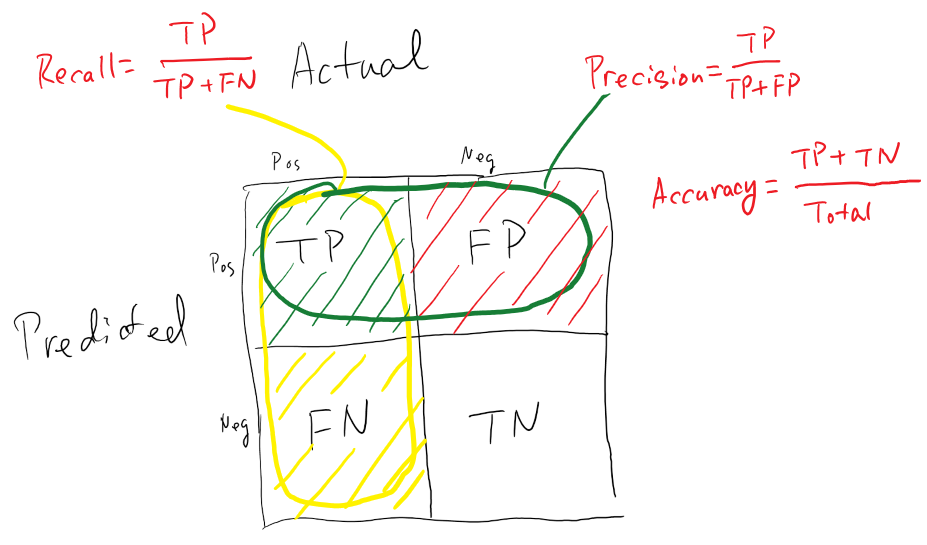

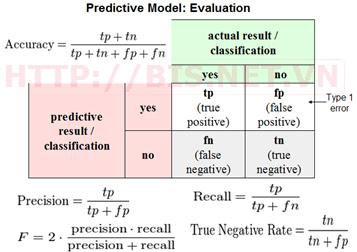

In [33]:
print(classification_report(y_test,y_pred_lg))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

   micro avg       0.78      0.78      0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



In [34]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       206
           1       0.56      0.55      0.55       102

   micro avg       0.71      0.71      0.71       308
   macro avg       0.67      0.67      0.67       308
weighted avg       0.71      0.71      0.71       308



In [53]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_log_proba(X_test)[:,1])

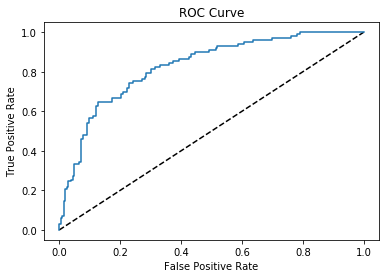

In [54]:
# Plot ROC curve
import matplotlib.pyplot as plt 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()

In [57]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, lg.predict_log_proba(X_test)[:,1])))

AUC: 0.8268608414239482
